<a href="https://colab.research.google.com/github/geovanemelo/Portfolios-Data-Science/blob/main/A_COVID_19_nas_20_maiores_economias_do_mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [Geovane Melo](https://sigmoidal.ai)*  

---
  

#A COVID-19 nas 20 maiores economias do mundo

No dia 31/12/19 em Wuhan, na China, foi registrado o primeiro caso de Covid-19 no mundo. Desde então o vírus altamente infectante assolou todo o globo e se tornou uma das maiores pandemias da história.

O Corona vírus é uma ameaça maior para pessoas da terceira idade e para pessoas com algumas comorbidades. Por mais que seja assintomático na maioria dos casos, até o mês de maio de 2021, já foram registradas mais de 3 milhões de mortes em todo mundo e por isso é necessário cuidados, estudos e pesquisas para combater esse mal.

<center><img alt="covid" width="50%" src="https://ibcdn.canaltech.com.br/1pF7qELXDU84DeaS7KyAQZ76QwA=/60x78:996x604/512x288/smart/i388482.png"></center>

Nesse estudo iremos analisar os dados da data de **26/01/2020 até 05/07/2021**, somente nas 20 maiores economias do planeta, que segundo [Dicionário Financeiro](https://www.dicionariofinanceiro.com/maiores-economias-do-mundo/) são:






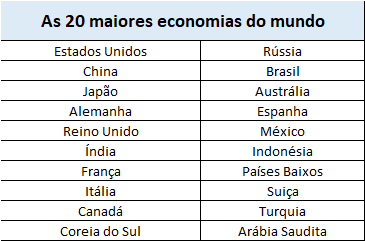

##Obtenção dos dados

Para esse estudo usaremos os dados do portal [Our World in Data](https://ourworldindata.org/coronavirus), onde os dados da pandemia em todo planeta são atualizados diariamente.

É importante deixar claro a dificuldade em obter dados do covid em tempo real. Com a pandemia em andamento e com um cenário onde existem conflitos dos dados governamentais e dados não oficiais, se torna difícil concluir que qualquer fonte seja inteiramente fidedigna à realidade.

## Dicionário das variáveis

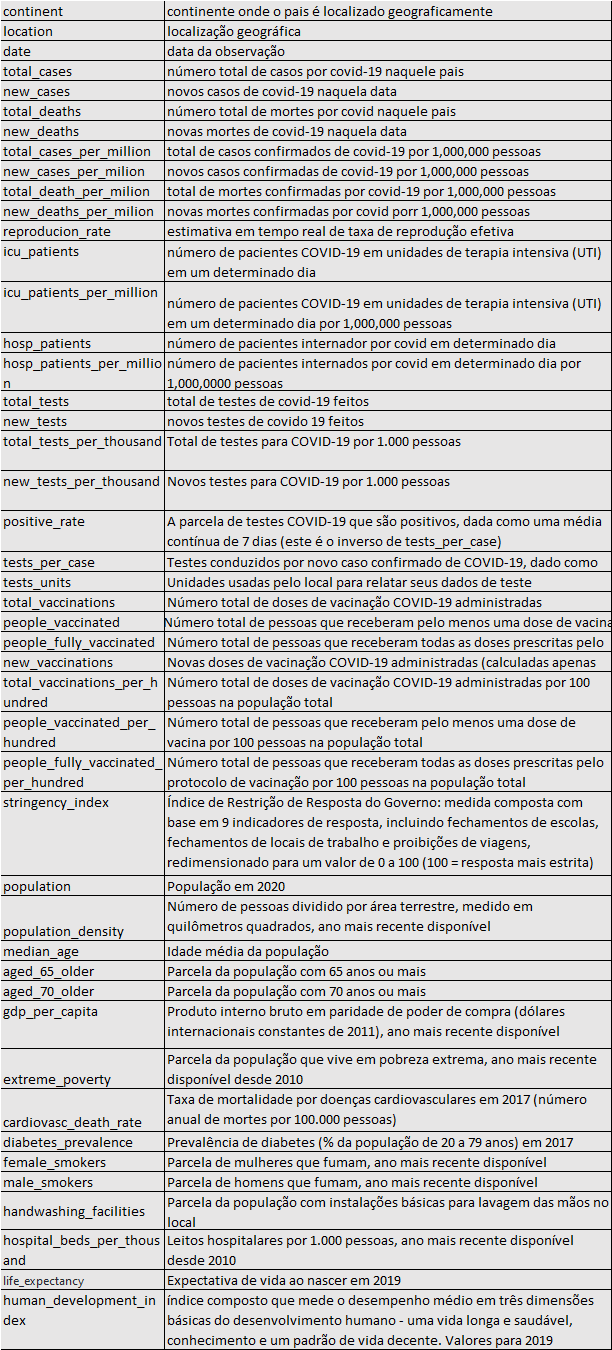

##Importação dos dados



In [1]:
# Importando as bibiliotecas utilizaadas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#setando estilo seaborn
sns.set_style()
%matplotlib inline

#importando dataset completo

df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",parse_dates=True)

In [2]:
#primeira impressão do dataset 
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
#tamanho do dataset
print("O dataset contém {} linhas e {} colunas".format(df.shape[0],df.shape[1]))

O dataset contém 100446 linhas e 60 colunas


##Mudanças necessárias

Nesse tópico será feita as mudanças que são necessárias em nosso *dataset* em um uma cópia. As mudanças são:

*   Deixar no dataset apenas os números das vinte maiores economias do mundo (listadas acima) 

*   Mudar o tipo da variável 'date' de string para date

*   Remoção das variáveis: 'iso_code' 'new_cases_smoothed',   
 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed',   'new_vaccinations_smoothed_per_million','handwashing_facilities'














In [4]:
#criando um dataset cópia 
df_clean = df.copy()
#criando uma lista com os paises selecionados(20 maiores economias)
ecos = ["Australia","Brazil","China","United States","Japan","Germany","United Kingdom","India","France","Italy","Canada","South Korea","Russia","Spain","Mexico","Indonesia","Netherlands","Switzerland","Turkey","Saudi Arabia"]

In [5]:
#filtrando a coluna 'location' apenas com os países inseridos na lista 'ecos'
df_clean = df.loc[df['location'].isin(ecos)]

In [6]:
#analisando os tipos de váriavel
df_clean.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [7]:
#Transformando a coluna data em formato datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
#Remoção das variáveis que não serão utilizadas
todrop=[ 'iso_code', 'new_cases_smoothed',
'new_deaths_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million','handwashing_facilities','excess_mortality']
df_clean.drop(todrop,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
#visualizando como ficou o dataset após mudanças
df_clean.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
5268,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.157,0.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.944
5269,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.196,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.944
5270,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,0.196,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.944
5271,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,0.235,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.944
5272,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,0.353,0.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25499881.0,3.202,37.9,15.504,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.944


In [10]:
#verificando o tamanho do dataset após mudanças
print("O dataset contém {} linhas e {} colunas".format(df_clean.shape[0],df_clean.shape[1]))

O dataset contém 10351 linhas e 45 colunas


##Tratamento de dados ausentes

Antes de entrarmos na análise exploratória, nessa sessão trataremos dos possíveis dados ausentes no *dataset*. Faremos uma inspeção pelas colunas verificando a existência desses dados e realizando a melhor operação que julgarmos necessárias com eles.

<center><img alt="covid" width="50%" src="https://sigmoidal.ai/wp-content/uploads/2019/08/Missing-Puzzle-Pieces-600x398-betanews_3_xi3dx0-2.jpg"></center>

In [11]:
#Quantidade de valores nulo por variável
df_clean.isnull().sum().sort_values(ascending=False)

people_fully_vaccinated_per_hundred    7943
people_fully_vaccinated                7943
people_vaccinated_per_hundred          7721
people_vaccinated                      7721
new_vaccinations                       7534
hosp_patients_per_million              7366
hosp_patients                          7366
total_vaccinations                     7344
total_vaccinations_per_hundred         7344
icu_patients_per_million               6906
icu_patients                           6906
total_tests                            3594
total_tests_per_thousand               3594
new_tests                              3566
new_tests_per_thousand                 3566
extreme_poverty                        3072
tests_per_case                         2626
positive_rate                          2623
tests_units                            1611
reproduction_rate                       621
new_deaths                              564
new_deaths_per_million                  564
total_deaths                    

E agora? Agora que identificamos a quantidade de valores nulos, o que faremos com cada coluna não preenchida? Temos **duas principais** alternativas, e são elas:

* **Preencher** 

Neste método preencheremos os dados ausentes com valores estatísticos. Podendo ser a média, mediana, moda ou zeros.


*   **Excluir**

Nos casos em que os dados faltantes estão em pequeno número, ocorrem aleatoriamente e sua ausência não acarretará em algum resultado significativo, é melhor excluir a linha. Para excluir a coluna é necessário analisar a importância da mesma no *dataset*, se a mesma não for vital para análise e podendo até mesmo ser substituída por uma outra, exclui-se a coluna.







No nosso *dataset* faremos os seguintes procedimentos:

Nas variáveis: *`people_fully_vaccinated_per_hundred`, `people_fully_vaccinated`, `people_vaccinated_per_hundred`, `people_vaccinated,new_vaccinations`, `total_vaccinations`, `total_vaccinations_per_hundred`, `hosp_patients_per_million`, `hosp_patients`, `icu_patients_per_million`, `icu_patients`, `total_tests`, `total_tests_per_thousand`, `new_tests_per_thousand`, `new_tests,new_deaths`, `new_deaths_per_million`, `total_deaths`, `total_deaths_per_million`, `new_cases`, `new_cases_per_million`, `total_cases_per_million`, `total_cases`.* **preencheremos os valores nulos com 0**. Isso porque nessas variáveis, os campos que se encontram vazios são porque não ocorreram o evento especifico até aquela determinada data ou não aconteceu naquele determinado dia. Por exemplo:

Na coluna `people_fully_vaccinated`, todos os campos antes da data da primeira vacinação estão com valores nulos, pelo fato de ninguém ainda ter sido vacinado, ou seja, 0 pessoas.

Na coluna `new_cases`, quando o valor esta como nulo, não obteve nenhum registro naquela data, ou seja, 0 casos

In [12]:
#lista das variáveis que receberao 0 nos valores nulos
tozero = ['people_fully_vaccinated_per_hundred', 'people_fully_vaccinated', 'people_vaccinated_per_hundred', 'people_vaccinated','new_vaccinations', 'total_vaccinations', 'total_vaccinations_per_hundred', 'hosp_patients_per_million', 'hosp_patients', 'icu_patients_per_million', 'icu_patients', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests','new_deaths', 'new_deaths_per_million', 'total_deaths', 'total_deaths_per_million', 'new_cases', 'new_cases_per_million', 'total_cases_per_million', 'total_cases']

In [13]:
#transformando os valores nulos nas colunas listadas em 0
df_clean[tozero]=df_clean[tozero].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Nas variáveis: `extreme_poverty`, `tests_per_case`, `positive_rate`, alguns paises(`location`) apresentam números e outros não, por isso optamos por uma **exclusão geral** das variáveis.

In [14]:
#lista com as variaveis
todrop2=['extreme_poverty','tests_per_case','positive_rate']
#excluindo as variáveis
df_clean.drop(todrop2,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


E nas variáveis: `tests_units`,`reproduction_rate`,`stringency_index`, preencheremos os valores nulos com o valor que está na próxima linha ou na anterior

In [15]:
#lista com as variaveis
tomodify=['tests_units','reproduction_rate','stringency_index']
#preenchendo com valores anteriores ou posteriores
df_clean[tomodify]=df_clean[tomodify].bfill().ffill()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
#Verificando quantidade valores nulos
df_clean.isnull().sum()

continent                              0
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million                0
new_cases_per_million                  0
total_deaths_per_million               0
new_deaths_per_million                 0
reproduction_rate                      0
icu_patients                           0
icu_patients_per_million               0
hosp_patients                          0
hosp_patients_per_million              0
new_tests                              0
total_tests                            0
total_tests_per_thousand               0
new_tests_per_thousand                 0
tests_units                            0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
new_vaccinations

Feito todo preenchimento de valores nulos no *dataset*, iremos para a análise exploratória do projeto.

#Analise exploratória

Na nossa análise buscaremos nos números respostas. O que covid causou até então? Em qual desses países tivemos mais números? O que foi feito até agora para combater? Entre outros *insigths* que tivermos durante o processo.

<center><img alt="covid" width="50%" src="https://advancedinstitute.ai/wp-content/uploads/2019/04/analise_dados-1170x500.png"></center>

##Países com mais registros.
Quais foram os países desses 20 que mais tiveram casos? Seriam esses o que mais registraram óbitos também? Nesse tópico analisaremos os números gerais de casos e mortes.

In [17]:
#achando a ultima data preenchida no dataset
datahoje=df_clean['date'].iloc[-1]
datahoje

Timestamp('2021-07-05 00:00:00')

In [65]:
#tabela de mais casos do covid-19 até o dia 05/07/2021
df_clean[['location','date','total_cases','total_deaths']].query("date == '2021-07-05'").sort_values('total_cases',ascending=False)

,location,date,total_cases,total_deaths
95723,United States,2021-07-05,33723289.0,605567.0
42074,India,2021-07-05,30619932.0,403281.0
13271,Brazil,2021-07-05,18792511.0,525112.0
33069,France,2021-07-05,5848973.0,111360.0
75072,Russia,2021-07-05,5568104.0,136279.0
92959,Turkey,2021-07-05,5449464.0,49959.0
95192,United Kingdom,2021-07-05,4947274.0,128495.0
45765,Italy,2021-07-05,4263797.0,127680.0
85535,Spain,2021-07-05,3866475.0,80934.0
35197,Germany,2021-07-05,3738862.0,91068.0


In [19]:
#tabela de mais mortes por covid-19 até o dia 05/07/2021
df_0609=df_clean[['location','date','total_cases','total_deaths']].query("date == '2021-06-09'").sort_values('total_deaths',ascending=False)
df_0609

,location,date,total_cases,total_deaths
95697,United States,2021-06-09,33409836.0,598509.0
13245,Brazil,2021-06-09,17122877.0,479515.0
42048,India,2021-06-09,29182532.0,355705.0
58990,Mexico,2021-06-09,2441866.0,229353.0
95166,United Kingdom,2021-06-09,4551694.0,128124.0
45739,Italy,2021-06-09,4237790.0,126767.0
75046,Russia,2021-06-09,5096657.0,122802.0
33043,France,2021-06-09,5787125.0,110364.0
35171,Germany,2021-06-09,3715870.0,89592.0
85509,Spain,2021-06-09,3715454.0,80332.0


Como podemos ver acima, o **Estados unidos é o país que lidera o ranking de casos e também o ranking de mortes**

<center><img alt="covid" width="50%" src="https://ichef.bbci.co.uk/news/640/cpsprodpb/10387/production/_111493466_gettyimages-1213314129.jpg"></center>

In [20]:
#variável com a população dos eua
euapopulation=df_clean[['location','population']].query("location == 'United States'").iloc[0,1]
#variável com calculo de % da quantidade da população que contraiu covid
pctcovideua=(df_0609.iloc[0,2] / euapopulation) * 100
pctcovideua=pctcovideua.astype(int)
#porcentagem de óbito em relação a quantidade de contaminados
pctobito=round(((df_0609.iloc[0,3] / df_0609.iloc[0,2]) * 100),2)

1.79

In [21]:
print(f"Com uma população de {euapopulation}(aproximadamente 331 millhões) pessoas, os Estados Unidos obteve {df_0609.iloc[0,2]} (cerca de 33 milhões) casos de covid")
print(f"Dados esses números, é possivel dizer que cerca de {pctcovideua}% da população total contraiu covid")
print(f"Desses {pctcovideua}%, cerca de {pctobito}% faleceram vitimas do Covid-19")

Com uma população de 331002647.0(aproximadamente 331 millhões) pessoas, os Estados Unidos obteve 33409836.0 (cerca de 33 milhões) casos de covid
Dados esses números, é possivel dizer que cerca de 10% da população total contraiu covid
Desses 10%, cerca de 1.79% faleceram vitimas do Covid-19


Com uma população de 331002647(aproximadamente 331 millhões) pessoas, os Estados Unidos obteve **33414025.(cerca de 33 milhões) casos de covid**

Dados esses números, é possivel dizer que cerca de **10% da população total** contraiu covid

Desses 10%, cerca de **1.79% faleceram vitimas do Covid-19**

<center><img alt="covid" width="50%" src="https://media.gazetadopovo.com.br/2020/11/17190326/covid-eua-960x540.jpg"></center>

Vimos também nas tabelas acima, que estão respectivamente Índia e Brasil situados em segundo e terceiro lugar no ranking de mais casos. Porém no ranking de mais mortes, **o Brasil ultrapassa a índia e se torna o segundo com mais vítimas fatais no mundo.**






In [22]:
#porcentagem de mortos em relação a quantidade de pessoas contaminadas no brasil
pctobitobr = round(((df_0609.iloc[1,3] / df_0609.iloc[1,2]) * 100),2)
#porcentagem de mortos em relação a quantidade de pessoas contaminadas na india
pctobitoin = round(((df_0609.iloc[2,3] / df_0609.iloc[2,2]) * 100),2)


In [23]:
print(f"Na India cerca de {pctobitoin}% dos contaminados por covid acabaram morrendo")
print(f"Já no Brasil, {pctobitobr}% dos contaminados foram mortos")
print(f"Isso explica, a 'ultrapassagem' do Brasil no ranking de mortos")

Na India cerca de 1.22% dos contaminados por covid acabaram morrendo
Já no Brasil, 2.8% dos contaminados foram mortos
Isso explica, a 'ultrapassagem' do Brasil no ranking de mortos


Na India cerca de 1.22% dos contaminados por covid acabaram morrendo

Já no Brasil, **2.8% dos contaminados foram mortos**

Isso explica, a 'ultrapassagem' do Brasil no ranking de mortos

A seguir veremos um pouco melhor dos registros de números de casos e sua relação com o número de mortes

<center><img alt="covid" width="50%" src="https://www.socialismocriativo.com.br/wp-content/uploads/2020/10/5f8086701f000009360c1a04.jpeg"></center>

##Casos x Mortes

Sabemos que a Covid-19 é um virus mortal, com milhões de vitimas em todo mundo, porém sabemos também a grande maioria das pessoas que contraiem o vírus apresentam sintomas muito leves ou até mesmos nada. Buscaremos nesse tópico mostrar os números de casos e mortes.

Nesse tópico, diferente do acima, usaremos a variável `cases_per_million` e `deaths_per_million`, as quais apresentam números baseados por um milhão de pessoas. Dessa forma teremos mais noção do impacto do virus causado em relação ao tamanho da população

In [66]:
#dataset com os números totais de casos e morte por um milhçao de pessoas e data mais recente
casexdeath=df_clean[['location','date','total_cases_per_million','total_deaths_per_million']].query("date == '2021-07-05'").sort_values(by='total_deaths_per_million')
#tirando valor decimal para melhor visualização
casexdeath[['total_cases_per_million','total_deaths_per_million']]=casexdeath[['total_cases_per_million','total_deaths_per_million']].astype('int')

casexdeath



,location,date,total_cases_per_million,total_deaths_per_million
19412,China,2021-07-05,63,3
5794,Australia,2021-07-05,1209,35
84557,South Korea,2021-07-05,3150,39
46778,Japan,2021-07-05,6390,117
42565,Indonesia,2021-07-05,8459,223
78741,Saudi Arabia,2021-07-05,14190,226
42074,India,2021-07-05,22188,292
92959,Turkey,2021-07-05,64613,592
16768,Canada,2021-07-05,37763,697
75072,Russia,2021-07-05,38154,933


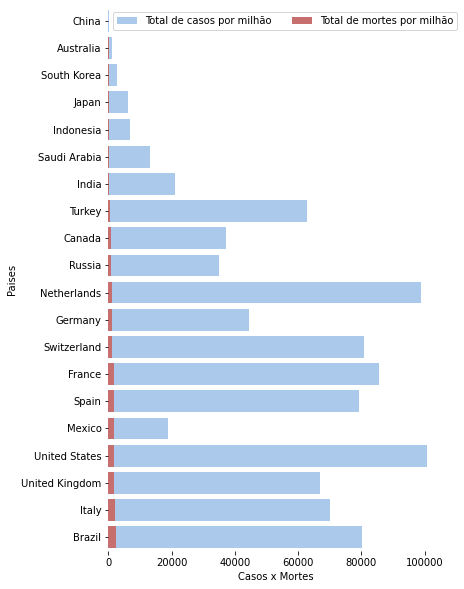

In [25]:
#Iniciando a figura 
f, ax = plt.subplots(figsize=(6,10))

#Plotar total de casos
sns.set_color_codes('pastel')
sns.barplot(x=('total_cases_per_million'),y='location',data=casexdeath,label="Total de casos por milhão",color="b")

#Plotar total de mortes
sns.set_color_codes("muted")
sns.barplot(x='total_deaths_per_million',y='location',data=casexdeath,label="Total de mortes por milhão",color="r")

#adicionar legenda e informação
ax.legend(ncol=5, loc=0, frameon=True)
ax.set( ylabel="Paises",
xlabel="Casos x Mortes")
sns.despine(left=True, bottom=True)

Vemos acima, o Brasil liderando esse quesito, mostrando a sua fragilidade em 'curar' sua população. 

Em seguida, por estarmos tratando de uma variável baseada na quantidade populacional, vimos o impacto da pandemia na Itália. O segundo colocado nesse quesito, sofreu muito com o vírus bem no começo da pandemia, onde o conhecimento sobre prevenções e procedimentos era ainda muito pequeno.

É interessante também observar a Índia, segunda colocada no ranking de casos. Esse gráfico mostra que a quantidade de infectados em relação ao tamanho da população é bem menor do que muitos países, e o número de mortes também é mínimo, tanto que a barra vermelha não é visível no gráfico.

##Cronologia do vírus

Com mais de um ano do pandemia, tivemos diversas "ondas", que são picos de contaminação, períodos onde o vírus esteve mais presente na localização. Nessa sessão tentaremos identificar essas ondas e suas possíveis causas e consequências.

<center><img alt="covid" width="50%" src="https://s1.static.brasilescola.uol.com.br/be/2021/03/segunda-onda.jpg"></center>

Para fazermos essa análise, faremos uma **soma dos casos em todas localizações** por datas e **procurar identificar em quais datas tivemos os picos**.

In [26]:
#Criando um df com groupby com a soma dos casos e mortes de todas localizações separador por datas
gbt=df_clean.groupby(by="date")
gbt=gbt['location','total_cases','new_cases','total_deaths','new_deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


**Analisaremos os dados de números de casos nas 20 ecônomias.**

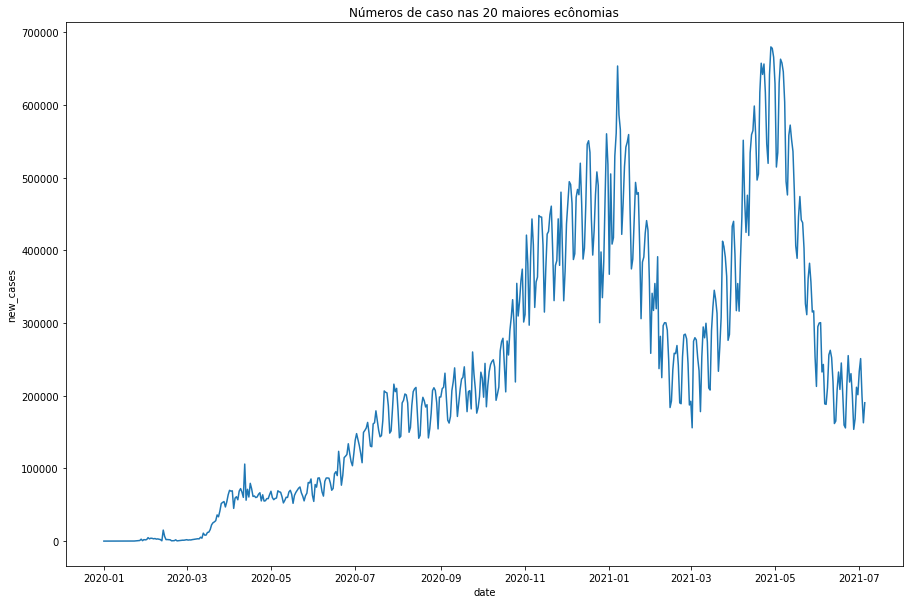

In [27]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_title("Números de caso nas 20 maiores ecônomias")
ax = sns.lineplot(x='date',y='new_cases',data=gbt);


**A partir do gráfico acima, faremos a exploração dessa sessão**

###Os primeiros quatro meses de pandemia

Como foi o inicio da pandemia nos países? Qual foi o primeiro pais a apresentar registros? A falta de conhecimento a respeito do vírus acarretou a mais mortes? Veremos nesse tópico.

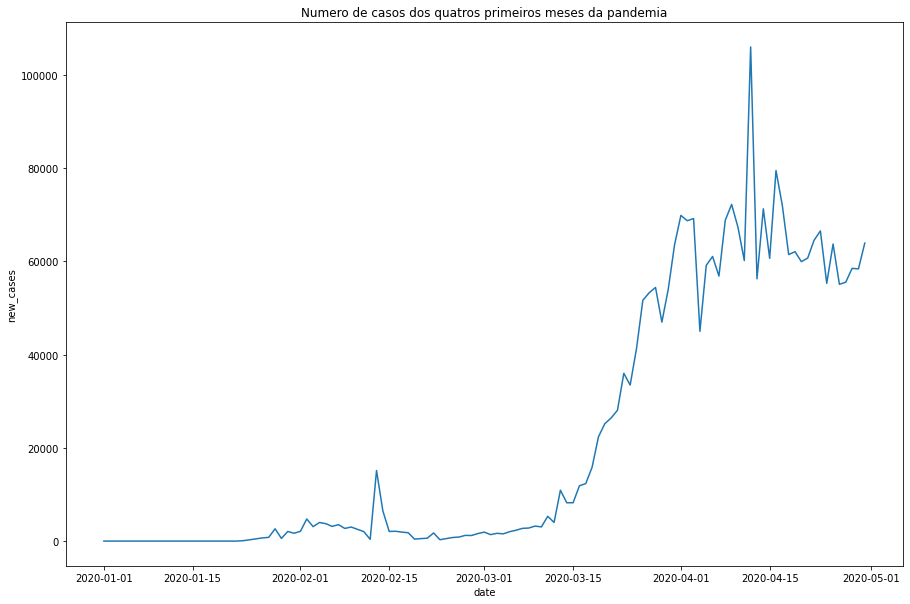

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_title("Numero de casos dos quatros primeiros meses da pandemia")

sns.lineplot(x='date',y='new_cases',data=gbt.loc[:'2020-04-30']);


É possível dizer que a **primeira onda de casos foi na metade do mês de abril, batendo mais de 100000 casos por dia.**

####Qual foi o primeiro pais a registrar o primeiro caso nesse *dataset*?

In [29]:
df_clean.sort_values(by='date').query("new_cases != 0.0").head(1)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
18883,Asia,China,2020-01-23,641.0,93.0,18.0,1.0,0.445,0.065,0.013,0.001,3.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tests performed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,261.899,9.74,1.9,48.4,4.34,76.91,0.761


O primeiros registros de caso nesse dataset é **na China, no dia 23 de janeiro de 2020**. No mesmo dia já foi registrada a primeira morte por covid.

<center><img alt="covid" width="50%" src="https://static.dw.com/image/53194358_303.jpg"></center>

*Lembrando que: Nesse projeto é feito somente a exploração do dataset para meios estudantis. A integridade dos dados é de responsabilidade do portal Our World in Data*

####Quais foram os países com mais registros nesses meses?

Sabendo que a China foi o berço do vírus, será que foi o país asiático que mais sofreu com a pandemia nesses primeiros meses? Veremos isso agora.

In [30]:

df_quatrom = df_clean.query("date == '2020-04-30'").sort_values(by='total_cases',ascending=False)[['date','location','total_cases']]

In [31]:
df_quatrom

,date,location,total_cases
95292,2020-04-30,United States,1081105.0
85104,2020-04-30,Spain,213435.0
45334,2020-04-30,Italy,205463.0
94761,2020-04-30,United Kingdom,178771.0
32638,2020-04-30,France,168861.0
34766,2020-04-30,Germany,163009.0
92528,2020-04-30,Turkey,120204.0
74641,2020-04-30,Russia,106498.0
12840,2020-04-30,Brazil,87187.0
18981,2020-04-30,China,82919.0


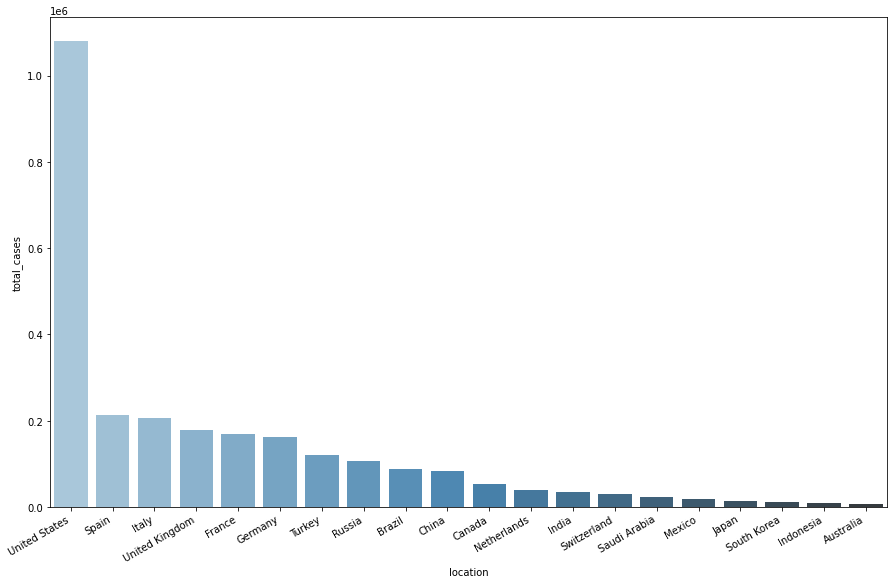

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

#sns.set_theme(style='whitegrid')

ax = sns.barplot(x='location',y='total_cases',data=df_quatrom,palette="Blues_d")

fig.autofmt_xdate()

Vemos acima uma **liderança solada do Estados Unidos no número de casos já nos primeiros meses (permanece até hoje)**

Também é interessante citar a **China, que aparece somente em 10º**. Primeira localização com registros, controlando bem a pandemia em seu território

E o Brasil, que é atualmente um dos epicentros da pandemia, nessa altura estava em 9º.

###Fechando 2020

Já considerado um dos piores anos da humanidade, 2020 com certeza será lembrado como o ano do corona vírus. Mas como foi o fim dele? Quais paises terminaram como mais casos e mortes?

<center><img alt="covid" width="50%" src="https://image.freepik.com/vetores-gratis/projeto-de-coronavirus-de-parada-2020-com-celula-de-virus-covid-19-caindo-em-fundo-escuro-ilustracao-de-surto-de-virus-corona-2019-ncov-fique-em-casa-fique-seguro-lave-as-maos-e-se-distancie_1314-2734.jpg"></center>

In [33]:
df_vinte = df_clean.query("date == '2020-12-31'").sort_values(by='total_cases',ascending=False)[['date','location','total_cases']]

In [34]:
df_vinte

,date,location,total_cases
95537,2020-12-31,United States,20100244.0
41888,2020-12-31,India,10266674.0
13085,2020-12-31,Brazil,7675973.0
74886,2020-12-31,Russia,3127347.0
32883,2020-12-31,France,2677666.0
95006,2020-12-31,United Kingdom,2496235.0
92773,2020-12-31,Turkey,2208652.0
45579,2020-12-31,Italy,2107166.0
85349,2020-12-31,Spain,1928265.0
35011,2020-12-31,Germany,1760520.0


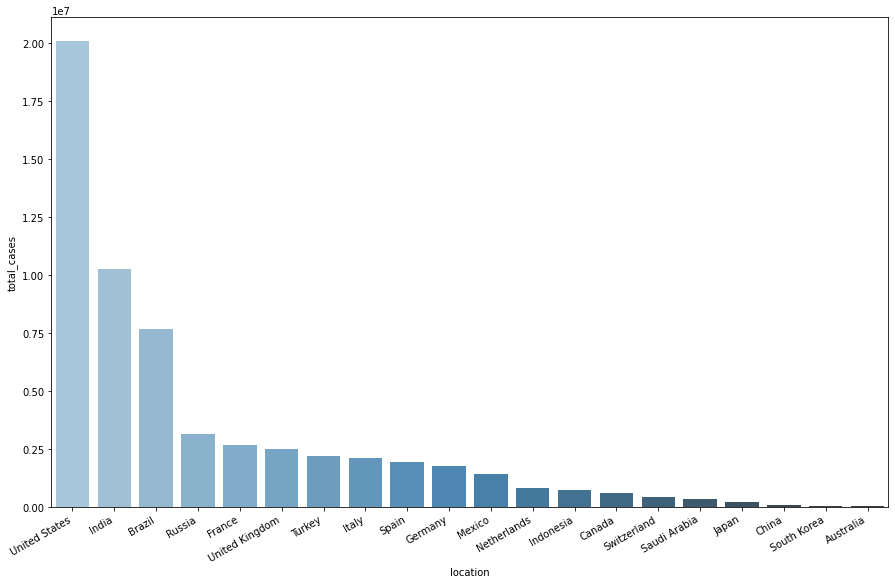

In [35]:
fig, ax = plt.subplots(figsize=(15,10))

#sns.set_theme(style='whitegrid')

ax = sns.barplot(x='location',y='total_cases',data=df_vinte,palette="Blues_d")

fig.autofmt_xdate()

####Liderança mantida na América e alteração no top 3

Como podemos ver, os Estados unidos permanece como primeiro colocado isolado, e a chegada forte de países muito populosos, como **Índia e Brasil**, para compor o top 3.

É interessante observar também a caída de casos em países Europeus, como **Espanha e Itália**. Esses países eram respectivamente segundo e terceiro colocado até o mês de Abril, e no fim de 2020 estão em oitavo e nono

Plotaremos quatro gráficos para observar o **comportamento anual** desses quatros países citados acima (Índia, Brasil, Espanha e Itália)



In [36]:
#Filtrando o df_clean até o fim de 2020
df_anoq = df_clean.query("date <= '2020-12-31'")

In [37]:
#selecionando só os 4 paises desejados
quatrop = ['India','Brazil','Italy','Spain']
df_anoq=df_anoq.loc[df_anoq['location'].isin(quatrop)]

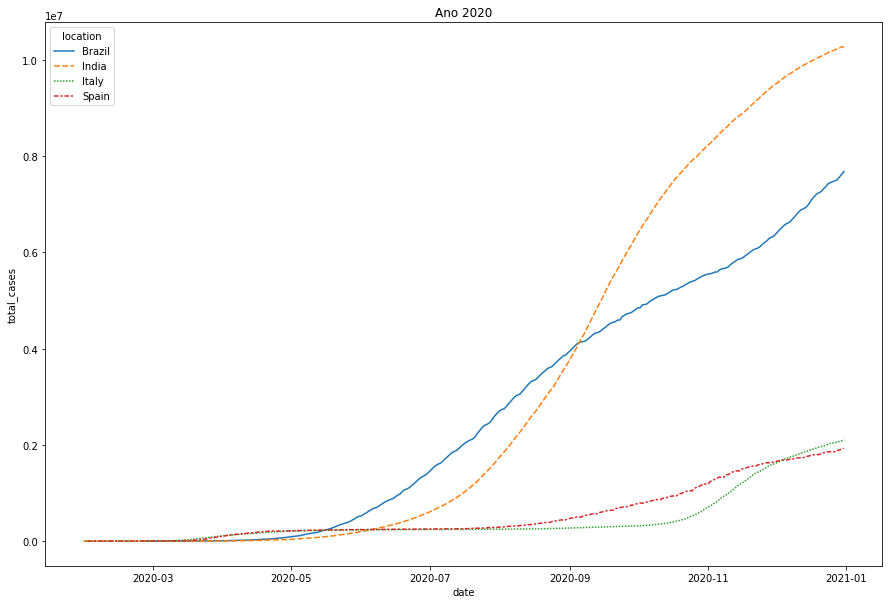

In [38]:
plt.rcParams['figure.figsize']=(15,10)

g=sns.lineplot(x='date',y='total_cases',hue='location',data=df_anoq,style='location');

g.set_title("Ano 2020");

**É** notório a **disparada de casos no Brasil e Índia, a partir do mês cinco**. Crescente que vem sendo mantida até hoje (06/2021)

**Itália e Espanha controlaram bem os números em seu territorio após o primeiro surto, porém ao final do ano apresentaram crescentes**. Essa época foi uma das piores ondas globais dessa pandemia.

###2021 difícil porém esperanças.

Como vimos acima, terminamos mal o ano de 2020 em relação a casos, e isso se manteve no início de 2021, plotaremos agora um gráfico com números dos 20 países, somente no ano de 2021 e observaremos o comportamento.

<center><img alt="covid" width="50%" src="https://image.freepik.com/vetores-gratis/feliz-ano-novo-2021-numero-com-sinal-de-parada-de-epidemia-de-coronavirus-covid-19-cartao-de-ferias-sem-pandemia-de-virus-modelo-de-design_149267-1516.jpg"></center>

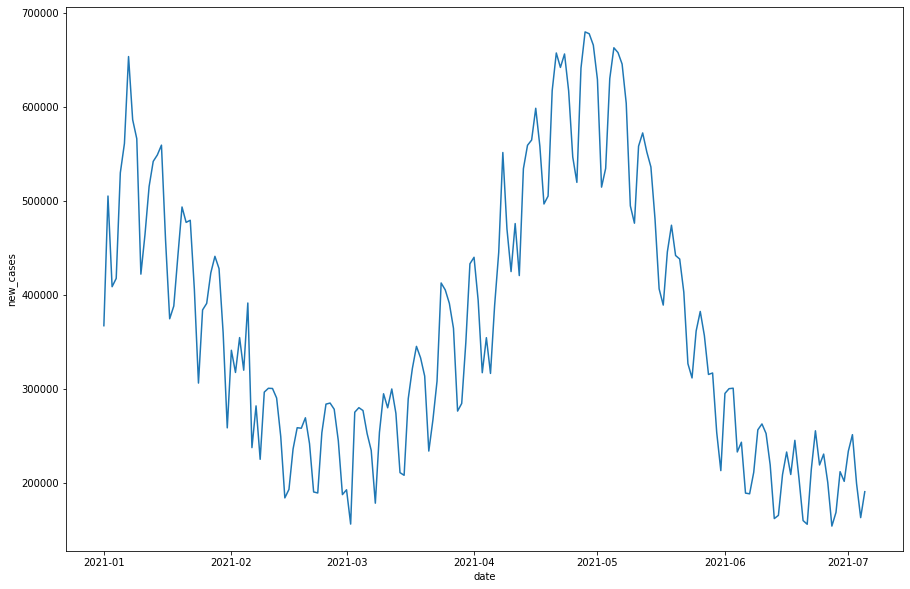

In [39]:
sns.lineplot(x='date',y='new_cases',data=gbt.loc['2021-01-01':]);

####Piores dias

Observamos acima, um começo muito díficil, uma caída, e a maior onda que tivemos na pandemia(no mês 05-21). Provavelmente essas foram as épocas com os piores dias.
Procuraremos agora em nosso dataset:

*   Dia com mais casos entre os 20 países (new_cases)
*   Dia com mais mortes entre os 20 países (new_deaths)
*   Dia com mais numero de pacientes em unidades de terapia intensiva(icu_patients)











In [40]:
#mais casos
gbt=df_clean.groupby(by="date")
gbt=gbt['location','total_cases','new_cases','total_deaths','new_deaths','icu_patients'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
#Dia com mais casos durante a pandemia
gbt.sort_values(by='new_cases',ascending=False).head(1)

,total_cases,new_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2021-04-28,104142515.0,680054.0,2174726.0,10221.0,27932.0


#####Mais casos
Acima temos o **dia com mais casos durante toda pandemia. No dia 28/04/2021, registramos 680045** casos nos 20 países.

In [67]:
df_clean[['location','date','new_cases']].query("date == '2021-04-28' ").sort_values(by='new_cases',ascending=False)

,location,date,new_cases
42006,India,2021-04-28,379308.0
13203,Brazil,2021-04-28,79726.0
95655,United States,2021-04-28,55150.0
92891,Turkey,2021-04-28,40444.0
33001,France,2021-04-28,31582.0
35129,Germany,2021-04-28,28263.0
45697,Italy,2021-04-28,13382.0
64233,Netherlands,2021-04-28,8670.0
85467,Spain,2021-04-28,8665.0
16700,Canada,2021-04-28,8246.0


In [68]:
#atribuindo as variaveis p/ o print
dia=gbt.sort_values(by='new_cases',ascending=False).index[0]
num=gbt.sort_values(by='new_cases',ascending=False).iloc[0,1].astype(int)
maiorresponsavel=df_clean.query("date == '2021-04-28' ").sort_values(by='new_cases',ascending=False).iloc[0,1]
numpais=df_clean.query("date == '2021-04-28' ").sort_values(by='new_cases',ascending=False).iloc[0,4].astype(int)
pctdia=round((numpais / num * 100),2)
segresponsavel=df_clean.query("date == '2021-04-28' ").sort_values(by='new_cases',ascending=False).iloc[1,1]
segnumpais=df_clean.query("date == '2021-04-28' ").sort_values(by='new_cases',ascending=False).iloc[1,4].astype(int)
segpctdia=round((segnumpais / num * 100),2)

In [69]:
print(f'No dia {dia}, tivemos o maior número de casos registrados em toda pandemia')
print(f'Nesse dia, foram registrados {num} novos casos nos 20 países estudados')
print(f'O maior responsável por esses números é o pais: {maiorresponsavel}')
print(f'No(a) {maiorresponsavel}, tivemos {numpais} novos casos registrados de covid')
print(f'Esse número representa {pctdia}% dos números totais registrados como novos casos nos 20 países')
print(f'O segundo maior responsável é o(a) {segresponsavel}, com {segnumpais}, representado {segpctdia}% dos novos casos')

No dia 2021-04-28 00:00:00, tivemos o maior número de casos registrados em toda pandemia
Nesse dia, foram registrados 680054 novos casos nos 20 países estudados
O maior responsável por esses números é o pais: India
No(a) India, tivemos 379308 novos casos registrados de covid
Esse número representa 55.78% dos números totais registrados como novos casos nos 20 países
O segundo maior responsável é o(a) Brazil, com 79726, representado 11.72% dos novos casos


No dia 2021-04-28 00:00:00, tivemos o maior número de casos registrados em toda pandemia

Nesse dia, foram registrados 680054 novos casos nos 20 países estudados
O maior responsável por esses números é o pais: **Índia**

No(a) Índia, tivemos 379308 novos casos registrados de covid

Esse número representa **55.78%** dos números totais registrados como novos casos nos 20 países

O segundo maior responsável é o(a) Brasil, com 79726, representado 11.72% dos novos casos

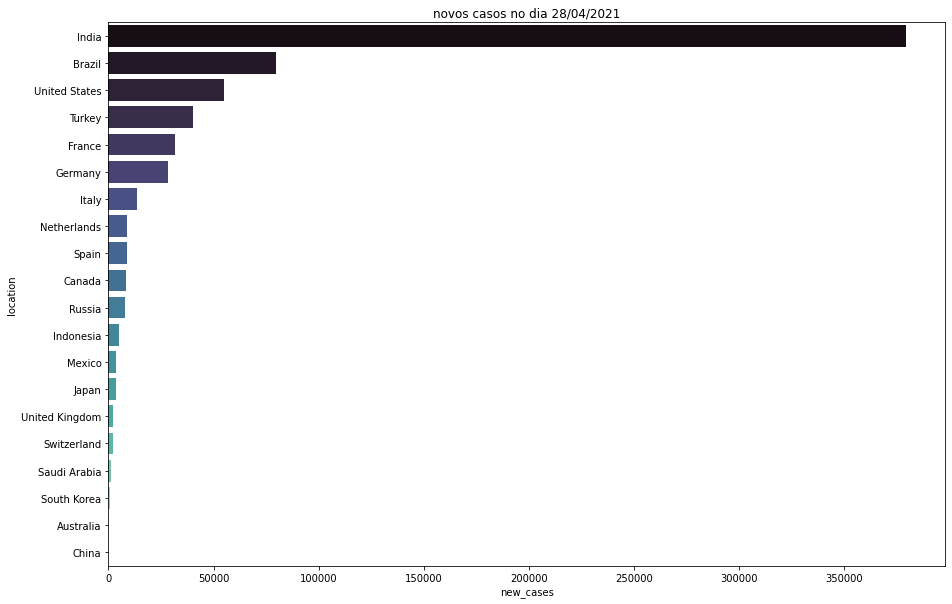

In [45]:
ax = sns.barplot(y='location',x='new_cases',palette='mako',data=df_clean.query("date == '2021-04-28' ").sort_values(by='new_cases',ascending=False))
ax.set_title("novos casos no dia 28/04/2021");

Agora procuraremos no *dataset* **o dia com mais mortes.**


In [46]:
gbt.sort_values(by='new_deaths',ascending=False).head(1)

,total_cases,new_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2021-01-20,68944255.0,493604.0,1453966.0,13028.0,46224.0


#####Mais mortes
Acima temos o **dia com mais mortes durante toda pandemia. No dia 20/01/2021, registramos 13028** mortes nos 20 países.

In [70]:
df_clean[['location','date','new_deaths']].query("date == '2021-01-20' ").sort_values(by='new_deaths',ascending=False)

,location,date,new_deaths
95557,United States,2021-01-20,4406.0
95026,United Kingdom,2021-01-20,1826.0
58850,Mexico,2021-01-20,1539.0
13105,Brazil,2021-01-20,1340.0
35031,Germany,2021-01-20,1013.0
74906,Russia,2021-01-20,582.0
45599,Italy,2021-01-20,524.0
85369,Spain,2021-01-20,464.0
32903,France,2021-01-20,310.0
42399,Indonesia,2021-01-20,267.0


In [48]:
#atribuindo as variaveis p/ o print
dia=gbt.sort_values(by='new_deaths',ascending=False).index[0]
num=gbt.sort_values(by='new_deaths',ascending=False).iloc[0,3].astype(int)
maiorresponsavel=df_clean.query("date == '2021-01-20' ").sort_values(by='new_deaths',ascending=False).iloc[0,1]
numpais=df_clean.query("date == '2021-01-20' ").sort_values(by='new_deaths',ascending=False).iloc[0,6].astype(int)
pctdia=round((numpais / num * 100),2)
segresponsavel=df_clean.query("date == '2021-01-20' ").sort_values(by='new_deaths',ascending=False).iloc[1,1]
segnumpais=df_clean.query("date == '2021-01-20' ").sort_values(by='new_deaths',ascending=False).iloc[1,6].astype(int)
segpctdia=round((segnumpais / num * 100),2)

In [49]:
print(f'No dia {dia}, tivemos o maior número de mortes diária registrados em toda pandemia')
print(f'Nesse dia, foram registrados {num} novas mortes nos 20 países estudados')
print(f'O maior responsável por esses números é o pais: {maiorresponsavel}')
print(f'No(a) {maiorresponsavel}, tivemos {numpais} novos casos registrados de covid')
print(f'Esse número representa {pctdia}% dos números totais registrados como novas mortes nos 20 países')
print(f'O segundo maior responsável é o(a) {segresponsavel}, com {segnumpais}, representado {segpctdia}% dos novas mortes')

No dia 2021-01-20 00:00:00, tivemos o maior número de mortes diária registrados em toda pandemia
Nesse dia, foram registrados 13028 novas mortes nos 20 países estudados
O maior responsável por esses números é o pais: United States
No(a) United States, tivemos 4406 novos casos registrados de covid
Esse número representa 33.82% dos números totais registrados como novas mortes nos 20 países
O segundo maior responsável é o(a) United Kingdom, com 1826, representado 14.02% dos novas mortes


No dia 2021-01-20 00:00:00, tivemos o maior número de mortes diária registrados em toda pandemia

Nesse dia, foram registrados 13028 novas mortes nos 20 países estudados
O maior responsável por esses números é o pais: **United States**

No(a) United States, tivemos 4406 novos casos registrados de covid

Esse número representa **33.82%** dos números totais registrados como novas mortes nos 20 países

O segundo maior responsável é o(a) United Kingdom, com 1826, representado 14.02% dos novas mortes


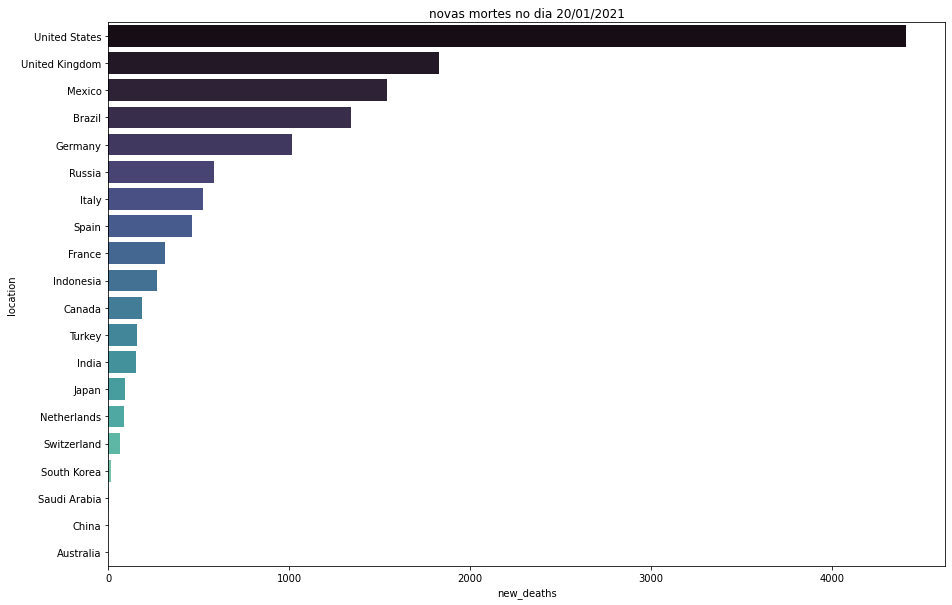

In [50]:
ax = sns.barplot(y='location',x='new_deaths',palette='mako',data=df_clean.query("date == '2021-01-20' ").sort_values(by='new_deaths',ascending=False))
ax.set_title("novas mortes no dia 20/01/2021");

**Agora procuraremos no dataset o dia com pacientes internados em UTI**

In [51]:
gbt.sort_values(by='icu_patients',ascending=False).head(1)

,total_cases,new_cases,total_deaths,new_deaths,icu_patients
date,,,,,
2021-01-13,65679677.0,542192.0,1384956.0,11925.0,47170.0


#####Mais pacientes em UTI
Acima temos o dia com mais pacientes em terapia intensiva(UTI) durante toda pandemia. **No dia 13/01/2021, registramos 47170 pacientes** internados nos 20 países


In [71]:
df_clean[['location','date','icu_patients']].query("date == '2021-01-13' ").sort_values(by='icu_patients',ascending=False)

,location,date,icu_patients
95550,United States,2021-01-13,28732.0
35024,Germany,2021-01-13,5164.0
95019,United Kingdom,2021-01-13,3626.0
85362,Spain,2021-01-13,2744.0
32896,France,2021-01-13,2701.0
45592,Italy,2021-01-13,2579.0
16595,Canada,2021-01-13,924.0
64128,Netherlands,2021-01-13,700.0
78568,Saudi Arabia,2021-01-13,0.0
92786,Turkey,2021-01-13,0.0


In [53]:
#atribuindo as variaveis p/ o print
dia=gbt.sort_values(by='icu_patients',ascending=False).index[0]
num=gbt.sort_values(by='icu_patients',ascending=False).iloc[0,4].astype(int)
maiorresponsavel=df_clean.query("date == '2021-01-13' ").sort_values(by='icu_patients',ascending=False).iloc[0,1]
numpais=df_clean.query("date == '2021-01-13' ").sort_values(by='icu_patients',ascending=False).iloc[0,12].astype(int)
pctdia=round((numpais / num * 100),2)
segresponsavel=df_clean.query("date == '2021-01-13' ").sort_values(by='icu_patients',ascending=False).iloc[1,1]
segnumpais=df_clean.query("date == '2021-01-13' ").sort_values(by='icu_patients',ascending=False).iloc[1,12].astype(int)
segpctdia=round((segnumpais / num * 100),2)

In [54]:
print(f'No dia {dia}, tivemos o maior número de pacientes em UTI registrados em toda pandemia')
print(f'Nesse dia, foram registrados {num} pacientes em UTI nos 20 países estudados')
print(f'O maior responsável por esses números é o pais: {maiorresponsavel}')
print(f'No(a) {maiorresponsavel}, tivemos {numpais} com mais pacientes em UTI')
print(f'Esse número representa {pctdia}% dos números totais registrados como novas mortes nos 20 países')
print(f'O segundo maior responsável é o(a) {segresponsavel}, com {segnumpais}, representado {segpctdia}% dos pacientes internados')

No dia 2021-01-13 00:00:00, tivemos o maior número de pacientes em UTI registrados em toda pandemia
Nesse dia, foram registrados 47170 pacientes em UTI nos 20 países estudados
O maior responsável por esses números é o pais: United States
No(a) United States, tivemos 28732 com mais pacientes em UTI
Esse número representa 60.91% dos números totais registrados como novas mortes nos 20 países
O segundo maior responsável é o(a) Germany, com 5164, representado 10.95% dos pacientes internados


No dia 2021-01-13 00:00:00, tivemos o maior número de pacientes em UTI registrados em toda pandemia

Nesse dia, foram registrados 47170 pacientes em UTI nos 20 países estudados
O maior responsável por esses números é o pais: United States

No(a) United States, tivemos 28732 com mais pacientes em UTI

Esse número representa 60.91% dos números totais registrados como novas mortes nos 20 países

O segundo maior responsável é o(a) Germany, com 5164, representado 10.95% dos pacientes internados

É interessante citar **que a data com maior número de internações antecede uma semana do dia com mais mortes no dataset**.

Veremos nesse gráfico *scatter* a relação desses dois números em todo conjunto

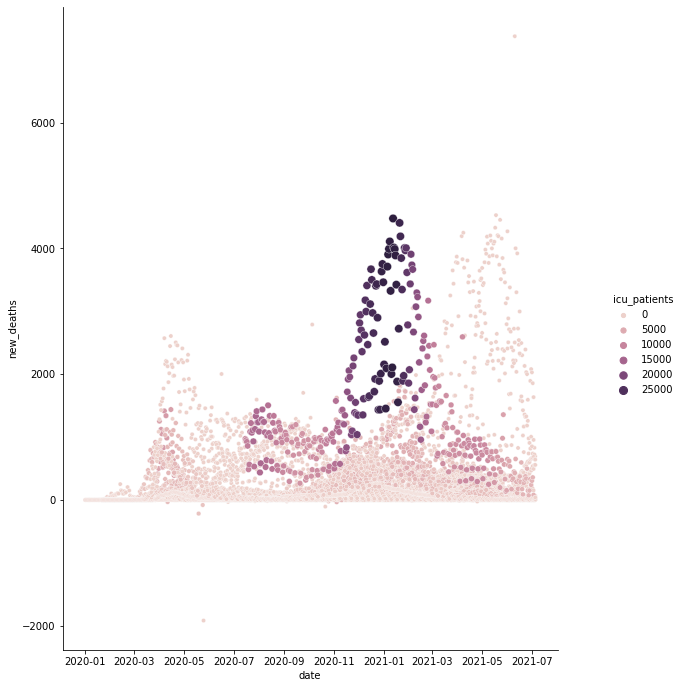

In [55]:
g=sns.relplot(x='date',hue='icu_patients',y='new_deaths',size='icu_patients',data=df_clean);
g.fig.set_size_inches(10,10)


No mês de Janeiro de 2021, vimos a crescente de mortes, é onde vemos o maior número de pacientes internados também, ilustrados com um tom mais forte.

OBS: *é possível que haja uma defasagem nos números de `icu_patients` nas ultimas linhas, devido a atualização ser feito em tempo real*




###A vacinação

Mesmo o ano de 2021 tendo os piores dias da pandemia, foi em 2021 que tivemos os usos de vacina contra o covid-19. Iremos ver nessa sessão os primeiros números desse processo de imunização nas 20 maiores economias do globo.

<center><img alt="covid" width="50%" src="https://www.camara.leg.br/midias/image/2020/10/img20201022140139807-768x512.jpg"></center>


####Primeiro registro de vacinação

Buscaremos no dataset o primeiro registro de vacinação. Identificaremos a localização e data do ocorrido

In [56]:
df_clean[['location','date','new_vaccinations']].query("new_vaccinations > 0").sort_values(by='date').head(1)

,location,date,new_vaccinations
16566,Canada,2020-12-15,718.0


O primeiro registro de vacinação **nesse *dataset*** é no dia 15/12/20, no Canadá. O pais aplicou 718 doses nesse primeiro dia de vacinação.

####Pais com mais vacinas aplicadas.

Agora veremos quais países estão mais avançados no processo de imunização. Iremos analisar nessa sessão a variável `total_vaccinations_per_hundred`, que contém o **número total de doses de vacinação administradas por 100 pessoas na população total**. Será analisado os números até o dia 05/07/2021


In [57]:
#df com numeros de vacinas agrupados por localização
df_vcn=df_clean[['location','total_vaccinations_per_hundred']].groupby("location").sum()

In [58]:
df_vcn.sort_values(by="total_vaccinations_per_hundred",ascending=False)

,total_vaccinations_per_hundred
location,
United Kingdom,10252.51
United States,8982.64
Canada,5622.28
Germany,5451.21
Italy,5280.21
France,5004.38
Switzerland,4932.95
Turkey,3938.02
Spain,3842.88


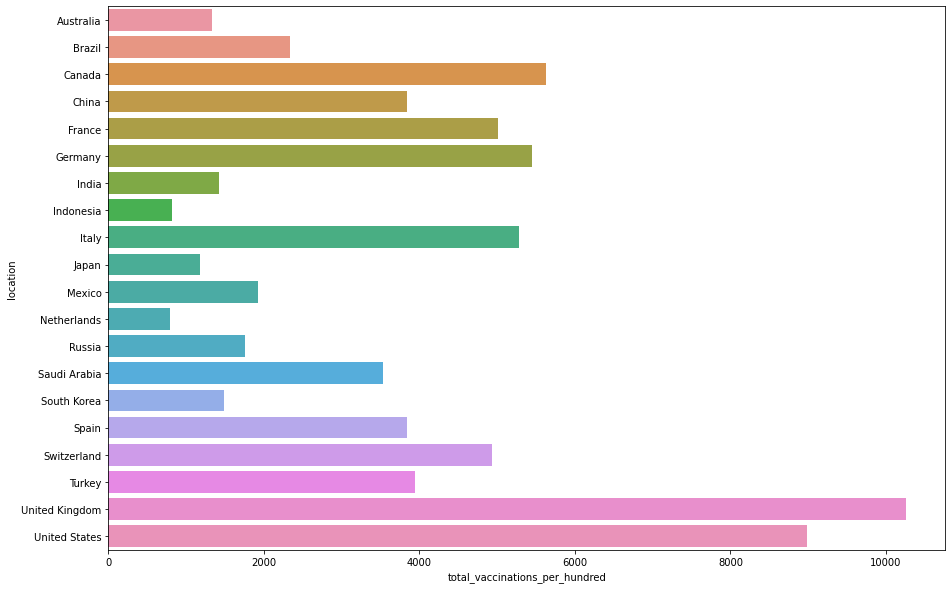

In [59]:
ax = sns.barplot(x='total_vaccinations_per_hundred',y=df_vcn.index,data=df_vcn)

O **Reino Unido** é o país com mais vacinas aplicadas no *dataset*.

####Efeito da vacinação

Veremos agora como funcionou o comportamento de gráficos mortes no Reino Unido depois do processo de imunização.

In [61]:
##identificando primeiro dia de vacinação no Reino Unido
df_clean[['location','date','new_vaccinations']].query("new_vaccinations > 0 & location == 'United Kingdom'").sort_values(by='date').head(1)

,location,date,new_vaccinations
95017,United Kingdom,2021-01-11,165844.0


Identificada a data inicial do processo de imunização : 2021-01-11

In [63]:
#dataset dos números de novas mortes após inicio da vacinaçao no Reino Unido
posvc=df_clean[['location','date','new_deaths']].query("location == 'United Kingdom' & date > '2021-01-11'")

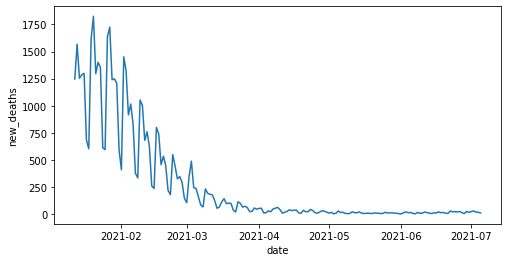

In [64]:
plt.rcParams['figure.figsize']=(8,4)
sns.lineplot(x='date',y='new_deaths',data=posvc);

Podemos ver uma gigantesca queda após 2 meses o início da imunização, com o processo ainda em andamento, os valores permanecem baixos.

##Conclusão

  Após análises é possivel concluir que o vírus do covid-19 foi bem impactante em praticamente todas grandes economias. A maior dela, Estados Unidos, Aparece no top em praticamente todos *rankings*, sendo assim, exaltando a importância das medidas de prevenção até nos países mais desenvolvidos. 

  A China, berço do vírus, junto com a Austrália e Coreia do Sul, mostraram bom controle dentro de seus terrítorios, assim sendo os países com menos números de mortes e casos no nosso estudo.

  No estudo, é ressaltado também a importância do vacinação. O reino unido, número no *ranking* de doses ministradas, obteve uma enorme queda dois meses após o processo de imunização em seu país.

  Por fim, é importante ressaltar que o estudo foi feito ainda com a pandemia em andamento, sendo assim não é possível tirar conclusões do impacto final nos países. 
  
*Os dados usados no projeto são de autoría do portal [Our World in Data](https://ourworldindata.org/coronavirus), tendo o autor nenhuma responsabiliade sobre sua veracidade.*

*Esse projeto foi feito apenas com cunho estudantil e exploratório, sem vínculo com nenhuma marca ou órgão governamental. Aberto a críticas e sugestões.*

---

Contato

[Linkedin](https://www.linkedin.com/in/geovane-melo-da-silva-105040147/)

[GitHub](https://github.com/geovanemelo)

geovanemelo81@gmail.com


